# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from collections import defaultdict

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

#Ignore warning
import warnings
warnings.filterwarnings('ignore', message='divide by zero encountered in reciprocal')

# Import your own code
from CouplesModel import CouplesModel

# Question 1

The model is specified in a class called CouplesClass. The class includes all model equations as well as methods for solving and simulating the model.

I create an instance of the model:

In [2]:
model = CouplesModel()

To solve the model using a discrete grid, I call the solve_discrete method. The procedure goes like this:
- Calculate the value of choice for all possible choices
- Check if the conditions aren't violated, else set value to negative infinity
- Find the maximum value, and corresponding choices

In [3]:
model.solve_discrete()

I know calculate HF/HM for different sets of parameters and make a table

In [4]:
#a. Setup for table
alpha = [0.25,0.5,0.75] #alpha grid
sigma = [0.5,1.0,1.5] #sigma grid
bank = defaultdict(str) #dictionary to store strings

#b. Make table
#i. Print header with sigma values
header = rf"alpha \ sigma|{sigma[0]:10.2}{sigma[1]:10.2f}{sigma[2]:10.2f}"
print(header)

#ii. Print seperator
print(f"{'-'*len(header[:header.index('|')])}+{'-'*len(header[header.index('|'):])}")

#iii. Print main table
for a in alpha:
    #o. Print index with alpha values
    bank[a] = f"{a:13.2f}|"
    
    #oo. Add output to string one-by-one through loop
    for s in sigma:
        #1. Set up and solve model based on alpha and sigma values
        temp = CouplesModel(**{'alpha':a,'sigma':s})
        temp.solve_discrete()
        
        #2. Calculate output
        out = temp.sol_disc.HF / temp.sol_disc.HM
        
        #3. Add output to string
        bank[a] += f"{out:10.2f}"
    
    #ooo. Print string
    print(bank[a])
        

alpha \ sigma|       0.5      1.00      1.50
-------------+-------------------------------
         0.25|      0.55      0.31      0.21
         0.50|      1.00      1.00      1.00
         0.75|      1.83      3.25      4.67


## Question 2

I calculate log(HF/HM) for different wF values using the method solve_wF_vec

In [5]:
model.solve_wF_vec(discrete=True)

I plot log(HF/HM) against log(wF/wM) using the method plot

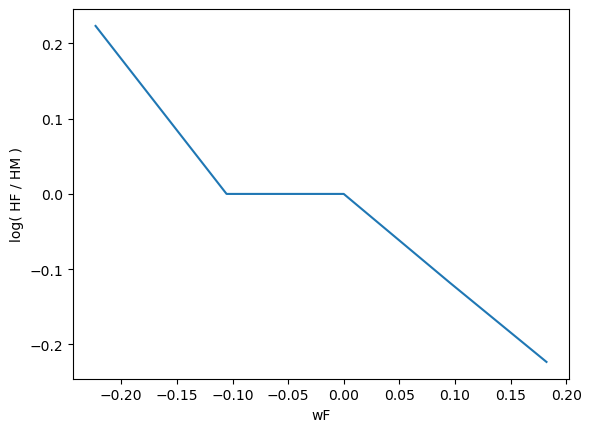

In [6]:
model.plot(discrete=True)

## Question 3

I solve the model with a continuous choice set using the method solve_continuous. I use the solver 'B-BFGS-H' and the discrete solution as an initial guess. 

In [7]:
model.solve_continuous()
model.sol_cont

namespace(LM=4.45452516833018,
          LF=4.45406321277115,
          HM=4.454911563536749,
          HF=4.454516642952472,
          V=-0.23811015823190512)

I calculate log(HF/HM) for different wF values using the method solve_wF_vec

In [8]:
model.solve_wF_vec()

I plot log(HF/HM) against log(wF/wM) using the method plot

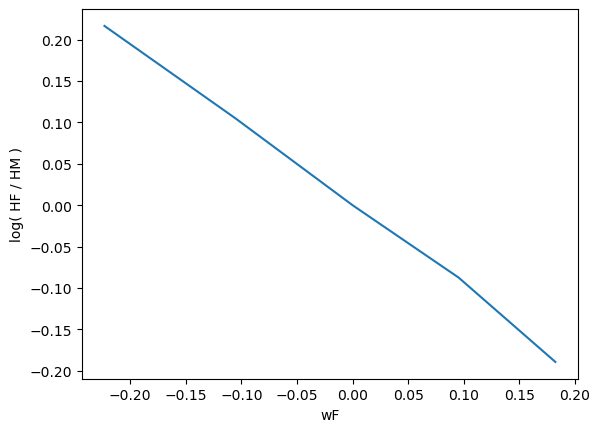

In [9]:
model.plot()

## Question 4

To find an $\alpha$ and $\sigma$ that minimizes $(\beta_0-\hat{\beta}_0)^2+(\beta_1-\hat{\beta}_1)^2$ I use a Simulated Minimum Distance estimator (SMD). The idea is to simulate the moments ($\hat{\beta}_0$,$\hat{\beta}_1$) using the model, and find the minimum distance to the moments in the data ($\beta_0$, $\beta_1$), then update the parameters and try again until convergence. The procedure goes like this:
1. Set initial $\alpha$, $\sigma$
2. Calculate $\hat{\beta}_0$,$\hat{\beta}_1$
3. Evaluate squared distance in moments, $(\beta_0-\hat{\beta}_0)^2+(\beta_1-\hat{\beta}_1)^2$
4. If distance is 0, or there is convergence, then terminate; else update $\alpha$, $\sigma$ and return to step 2.

I have nested this procedure in the method SMD. Here I apply a solver (Nelder-Mead) to evaluate the objective function (the squared moments) given by the method SMD_obj. For each guess the parameters are updated, the model is solved again, and $\hat{\beta}_0$,$\hat{\beta}_1$ are calculated using the method simulate_moments. simulate_moments calls the method estimate_beta to calculate $\hat{\beta}_0$,$\hat{\beta}_1$.

In [12]:
#Setup
guess = (0.5,1.) #initial guess
pnames = ('alpha', 'sigma') #parameter names
beta_data = (0.4,-0.1) #data for beta (target to match)
bounds = ((0.0001,0.9999),(0.001,np.inf)) #bounds for parameters

#Estimate
res = model.SMD(guess,pnames,beta_data,bounds)


guess:  [0.5 1. ]
obj:  0.9541005027939464
guess:  [0.525 1.   ]
obj:  0.9558981005756618
guess:  [0.5  1.05]
obj:  1.0282104639301402
guess:  [0.525 0.95 ]


/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/IntroProg/projects-2023-adamhjorgensen/inauguralproject/CouplesModel.py:86: RuntimeWarning: divide by zero encountered in power
  return ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))


obj:  0.878804372353843
guess:  [0.5375 0.9   ]
obj:  0.7033813688775342
guess:  [0.5125 0.9   ]
obj:  0.7363374919344452
guess:  [0.55 0.8 ]
obj:  0.5592804315271354
guess:  [0.575 0.7  ]
obj:  0.3702471350808611
guess:  [0.6 0.7]
obj:  0.3695353878842141
guess:  [0.64375 0.6    ]
obj:  0.2519934057282379
guess:  [0.68125 0.4    ]
obj:  0.09225084902781118
guess:  [0.753125 0.15    ]
obj:  0.05646640735609531
guess:  [0.821875 0.05    ]
obj:  0.1069956344130054
guess:  [0.93125 0.001  ]


/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/IntroProg/projects-2023-adamhjorgensen/inauguralproject/CouplesModel.py:94: RuntimeWarning: invalid value encountered in multiply
  return C**par.omega*H**(1-par.omega) + 1e-10
/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/IntroProg/projects-2023-adamhjorgensen/inauguralproject/CouplesModel.py:86: RuntimeWarning: divide by zero encountered in double_scalars
  return ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/IntroProg/projects-2023-adamhjorgensen/inauguralproject/CouplesModel.py:94: RuntimeWarning: invalid value encountered in double_scalars
  return C**par.omega*H**(1-par.omega) + 1e-10


obj:  0.17000000000000004
guess:  [0.859375 0.001   ]
obj:  0.17000000000000004
guess:  [0.715625 0.199   ]
obj:  0.05628961897988039
guess:  [0.64375 0.298  ]
obj:  0.08735376729413472
guess:  [0.646875 0.299   ]
obj:  0.08656430385219481
guess:  [0.690625 0.23675 ]
obj:  0.06198988383343936
guess:  [0.778125 0.11225 ]
obj:  0.06701821298240998
guess:  [0.7125   0.205625]
obj:  0.056355324650771206
guess:  [0.675    0.254625]
obj:  0.06832298065656484
guess:  [0.73359375 0.17615625]
obj:  0.05471666285252509
guess:  [0.73671875 0.16953125]
obj:  0.05552440129085538
guess:  [0.7546875 0.1466875]
obj:  0.05727876151642997
guess:  [0.72539062 0.18592187]
obj:  0.05526699154151473
guess:  [0.72226562 0.19254687]
obj:  0.055018198858896875
guess:  [0.73046875 0.18278125]
obj:  0.053793891059831705
guess:  [0.73300781 0.18121094]
obj:  0.053595843507841745
guess:  [0.74433594 0.16482031]
obj:  0.0541850690109078
guess:  [0.74375  0.169875]
obj:  0.05277264660107092
guess:  [0.74882812 0.166

Check solver status

In [ ]:
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.4428002123049139
             x: [ 5.469e-01  9.250e-01]
           nit: 15
          nfev: 50
 final_simplex: (array([[ 5.469e-01,  9.250e-01],
                       [ 5.469e-01,  9.249e-01],
                       [ 5.469e-01,  9.249e-01]]), array([ 4.428e-01,  4.428e-01,  4.428e-01]))

Check beta estimates from model

In [ ]:
model.estimate_beta()

array([ 0.16913743, -0.7241015 ])

## Question 6

I extend the model by including utility of home production for female household members. Home production can also include child care, and perhaps women have more utility from statying home and looking after kids (I know, that very progressive). The utility function then becomes
$$
\frac{Q^{1-\rho}}{1-\rho} - \nu \left( \frac{T_M^{1 + \frac{1}{\epsilon}}} {1 + \frac{1}{\epsilon}} + \frac{T_F^{1 + \frac{1}{\epsilon}}} {1 + \frac{1}{\epsilon}} \right) + \xi \frac{H_F^{1-\eta}}{1-\eta}
$$

I choose to restrict $\eta=1$ such that the extra utility term just takes the functional form of the log operator.

In [18]:
model.par.alpha=0.5
model.par.eta=1.
guess = (0.01,0.1)
pnames = ('xi','sigma')
beta_data = (0.4,-0.1)
bounds = ((-np.inf,np.inf),(0.001,np.inf))
res = model.SMD(guess,pnames,beta_data,bounds, tol=1e-06)

guess:  [0.01 0.1 ]


/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/IntroProg/projects-2023-adamhjorgensen/inauguralproject/CouplesModel.py:86: RuntimeWarning: divide by zero encountered in power
  return ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/IntroProg/projects-2023-adamhjorgensen/inauguralproject/CouplesModel.py:99: RuntimeWarning: divide by zero encountered in log
  return np.log(var)


obj:  0.1404289314870855
guess:  [0.0105 0.1   ]
obj:  0.13951219161730125
guess:  [0.01  0.105]
obj:  0.13964054322006036
guess:  [0.0105 0.105 ]
obj:  0.13868141785229396
guess:  [0.01075 0.1075 ]
obj:  0.13750043457114672
guess:  [0.01125 0.1025 ]
obj:  0.1371846390144686
guess:  [0.011875 0.10125 ]
obj:  0.13625476734902853
guess:  [0.012125 0.10875 ]
obj:  0.1346688418731178
guess:  [0.0129375 0.113125 ]
obj:  0.1319924235165568
guess:  [0.0140625 0.106875 ]
obj:  0.13098675404819762
guess:  [0.01571875 0.1065625 ]
obj:  0.1277604005950874
guess:  [0.01678125 0.1184375 ]
obj:  0.12301583605215499
guess:  [0.01923437 0.12703125]
obj:  0.11610257316176122
guess:  [0.02201562 0.12046875]
obj:  0.1117263686032852
guess:  [0.02655469 0.12414062]
obj:  0.10237513792347347
guess:  [0.03007031 0.14460937]
obj:  0.09137602299232793
guess:  [0.03724609 0.16363281]
obj:  0.07675995837857891
guess:  [0.04456641 0.16074219]
obj:  0.06682477911167076
guess:  [0.05723242 0.17759766]
obj:  0.0601

Check solver status

In [19]:
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.05728263398614625
             x: [ 4.975e-02  1.663e-01]
           nit: 64
          nfev: 132
 final_simplex: (array([[ 4.975e-02,  1.663e-01],
                       [ 4.975e-02,  1.663e-01],
                       [ 4.975e-02,  1.663e-01]]), array([ 5.728e-02,  5.728e-02,  5.728e-02]))

Check beta estimate

In [20]:
model.estimate_beta()

array([ 0.21610742, -0.25318809])

I can't perfectly match the data with this extension, but I come somewhat close. Below I try to improve the estimate, but without succes.

Try to improve using eta

In [21]:
guess = (res.x[0],res.x[1],1.)
pnames = ('xi','sigma','eta')
beta_data = (0.4,-0.1)
bounds = ((-np.inf,np.inf),(0.001,np.inf),(0.001,np.inf))
res = model.SMD(guess,pnames,beta_data,bounds, tol=1e-06)

guess:  [0.04974878 0.16632611 1.        ]


/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/IntroProg/projects-2023-adamhjorgensen/inauguralproject/CouplesModel.py:86: RuntimeWarning: divide by zero encountered in power
  return ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))
/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/IntroProg/projects-2023-adamhjorgensen/inauguralproject/CouplesModel.py:99: RuntimeWarning: divide by zero encountered in log
  return np.log(var)


obj:  0.05728263398614625
guess:  [0.05223621 0.16632611 1.        ]
obj:  0.05829414806801453
guess:  [0.04974878 0.17464241 1.        ]
obj:  0.05832887582244502
guess:  [0.04974878 0.16632611 1.05      ]


/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/IntroProg/projects-2023-adamhjorgensen/inauguralproject/CouplesModel.py:103: RuntimeWarning: divide by zero encountered in power
  return var**(1-param)/(1-param)


obj:  0.06523016769190272
guess:  [0.05140707 0.17187031 0.95      ]
obj:  0.06088102617904602
guess:  [0.05099249 0.17048426 0.975     ]
obj:  0.059630405414155874
guess:  [0.05016335 0.16771216 1.025     ]
obj:  0.06198197345615193
guess:  [0.05078521 0.16979124 0.9875    ]
obj:  0.05890634341777426
guess:  [0.05037064 0.16840518 1.0125    ]
obj:  0.05781117372850841
guess:  [0.05182164 0.15939585 1.00833333]
obj:  0.06052323288701558
guess:  [0.05026699 0.17083077 1.00208333]
obj:  0.06038228977912603
guess:  [0.05005971 0.16736565 1.00625   ]
obj:  0.057535343571722054
guess:  [0.05099249 0.16632611 1.        ]
obj:  0.060008902771487446
guess:  [0.04974878 0.17048426 1.        ]
obj:  0.05810825887767246
guess:  [0.04871234 0.16979124 1.00416667]
obj:  0.0593197945686782
guess:  [0.04928238 0.16892495 1.003125  ]
obj:  0.05820480420676173
guess:  [0.05042246 0.16719239 1.00104167]
obj:  0.05842317134134034
guess:  [0.0495674  0.16849181 1.00260417]
obj:  0.05794278126973175
guess:

Check solver status

In [22]:
res

       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 0.045405913286936696
             x: [ 4.975e-02  1.663e-01  1.000e+00]
           nit: 172
          nfev: 600
 final_simplex: (array([[ 4.975e-02,  1.663e-01,  1.000e+00],
                       [ 4.975e-02,  1.663e-01,  1.000e+00],
                       [ 4.975e-02,  1.663e-01,  1.000e+00],
                       [ 4.975e-02,  1.663e-01,  1.000e+00]]), array([ 4.541e-02,  5.266e-02,  5.266e-02,  5.266e-02]))

Check beta estimate

In [23]:
model.estimate_beta()

array([ 0.21862848, -0.24059155])